In [224]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

pd.set_option('display.max_columns', 500)
warnings.simplefilter(action='ignore')
%matplotlib inline

In [225]:
#load dataset
fish = pd.read_csv('../Fish Weight Prediction/Dataset/fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [226]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [227]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [228]:
fish.rename(columns={'Length1':'Vertical length','Length2':'Diagonal length','Length3':'Cross length'},inplace=True)
fish.head()

,Species,Weight,Vertical length,Diagonal length,Cross length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [229]:
fish.isna().sum()

Species            0
Weight             0
Vertical length    0
Diagonal length    0
Cross length       0
Height             0
Width              0
dtype: int64

In [230]:
fish.isnull().sum()

Species            0
Weight             0
Vertical length    0
Diagonal length    0
Cross length       0
Height             0
Width              0
dtype: int64

In [231]:
fish['Height'] = fish['Height'].apply(lambda x: round(x,2))
fish['Width'] = fish['Width'].apply(lambda x: round(x,2))
fish.head()

,Species,Weight,Vertical length,Diagonal length,Cross length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02
1,Bream,290.0,24.0,26.3,31.2,12.48,4.31
2,Bream,340.0,23.9,26.5,31.1,12.38,4.70
3,Bream,363.0,26.3,29.0,33.5,12.73,4.46
4,Bream,430.0,26.5,29.0,34.0,12.44,5.13


In [232]:
plt.style.use('default')

<AxesSubplot:xlabel='Species', ylabel='count'>

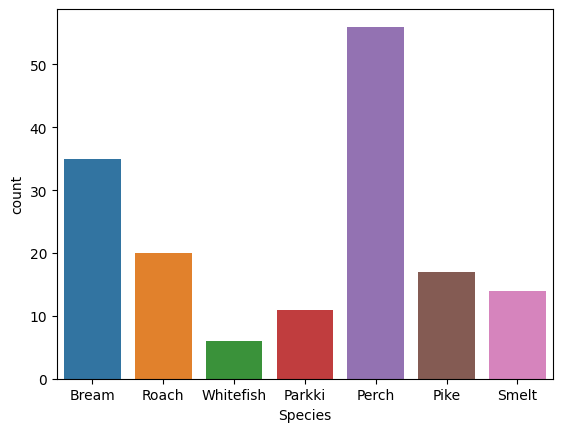

In [233]:
sns.countplot(x='Species',data=fish)

In [234]:
fishweights = pd.DataFrame(columns={'fishname','weight'})
fishweights

,fishname,weight


In [235]:
def weighestFish(fishname):
    fishweighttemp = fish[fish['Species']==fishname].describe()['Weight'][5]
    fishweights.loc[len(fishweights.index)] = [fishname,fishweighttemp]

In [236]:
[weighestFish(x) for x in fish['Species'].unique()]

[None, None, None, None, None, None, None]

In [237]:
fishweights.sort_values(by='weight',ascending=False,inplace=True)
fishweights


,fishname,weight
0,Bream,610.00
5,Pike,510.00
2,Whitefish,423.00
4,Perch,207.50
1,Roach,147.50
3,Parkki,145.00
6,Smelt,9.85


## 

In [238]:
# fish['Species'].unique().apply(lambda x: weighestFish(x))

In [239]:
fish[fish['Species']=='Perch'].describe()['Weight'][5]

207.5

<AxesSubplot:>

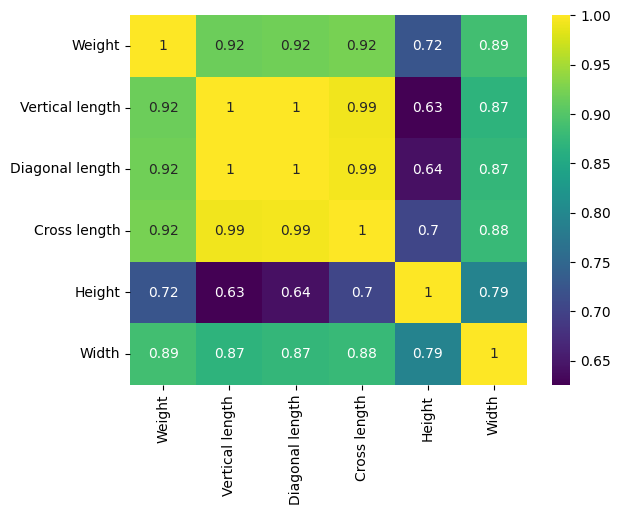

In [240]:
sns.heatmap(data=fish.corr(),annot=True,cmap='viridis')

## We can see that the Width of the fish is highly correlated with the weight , followed by cross length

## Also we can see that Vertical length,diagonal length and cross length are having multicolinearity so we can drop two of these variables and keep only Vertical length

In [241]:
fishwoweight = fish.drop(columns={'Weight','Diagonal length','Cross length'})


In [242]:
fishwoweight

,Species,Vertical length,Height,Width
0,Bream,23.2,11.52,4.02
1,Bream,24.0,12.48,4.31
2,Bream,23.9,12.38,4.70
3,Bream,26.3,12.73,4.46
4,Bream,26.5,12.44,5.13
...,...,...,...,...
154,Smelt,11.5,2.09,1.39
155,Smelt,11.7,2.43,1.27
156,Smelt,12.1,2.28,1.26
157,Smelt,13.2,2.87,2.07


<AxesSubplot:>

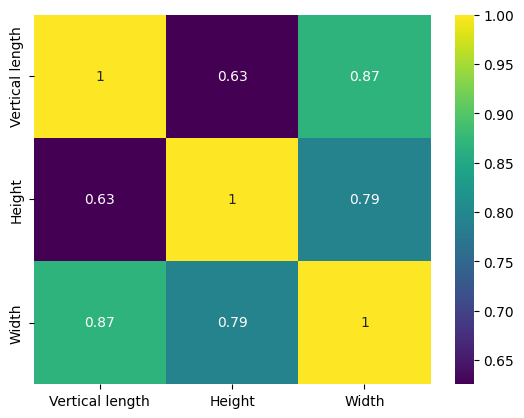

In [243]:
sns.heatmap(data=fishwoweight.corr(),annot=True,cmap='viridis')

In [105]:
num_cols = fish.columns.drop('Species')

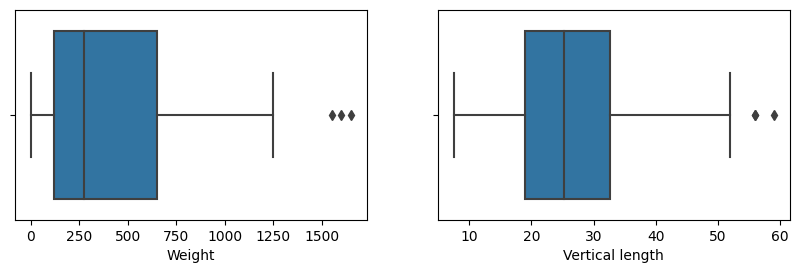

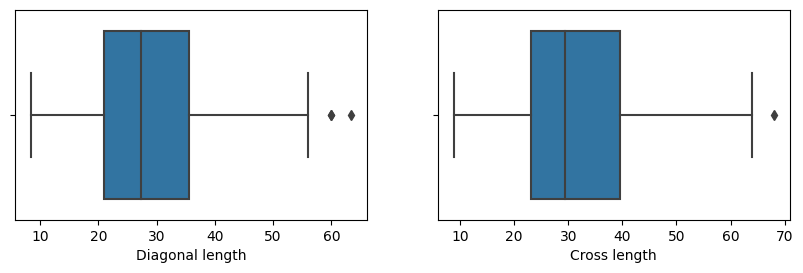

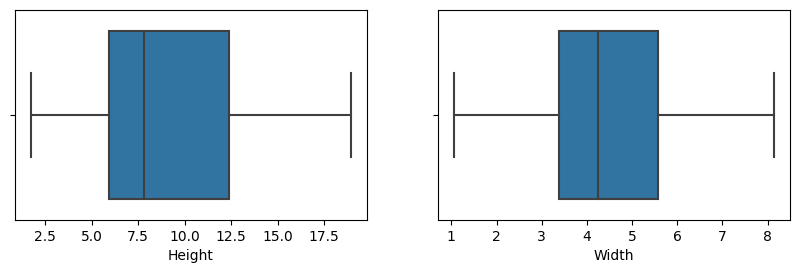

In [106]:
# num_cols = ['fixed acidity','citric acid','sulphates','alcohol']
i=0
while i < len(num_cols)-1:
    fig = plt.figure(figsize=[10,6])
 
    plt.subplot(2,2,1)
    sns.boxplot(x=num_cols[i], data=fish)
    i += 1
    plt.subplot(2,2,2)
    sns.boxplot(x=num_cols[i], data=fish)
    i += 1  

    
    plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Vertical length'>

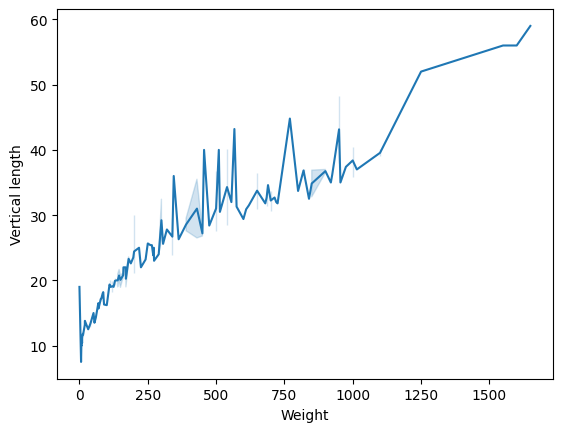

In [244]:
sns.lineplot(x='Weight',y='Vertical length',data=fish)

<AxesSubplot:xlabel='Width', ylabel='Height'>

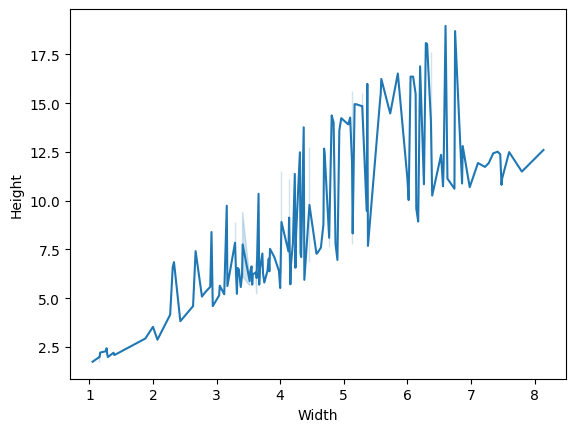

In [124]:
sns.lineplot(x='Width',y='Height',data=fish)

<AxesSubplot:xlabel='Weight', ylabel='Height'>

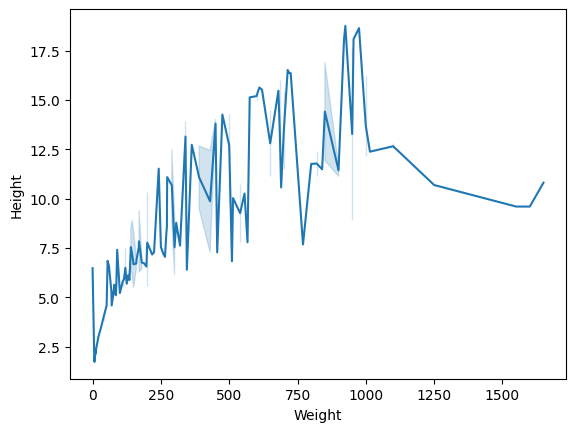

In [130]:
sns.lineplot(x='Weight',y='Height',data=fish)

<AxesSubplot:xlabel='Width', ylabel='Weight'>

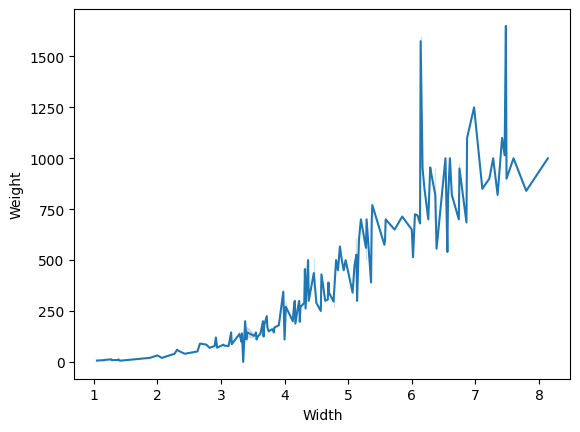

In [131]:
sns.lineplot(x='Width',y='Weight',data=fish)

<AxesSubplot:>

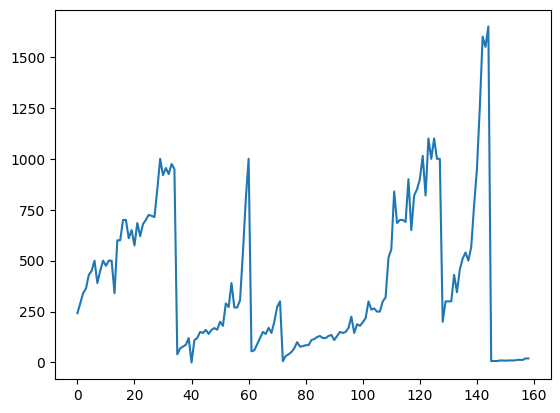

In [125]:
fish['Weight'].plot.line()

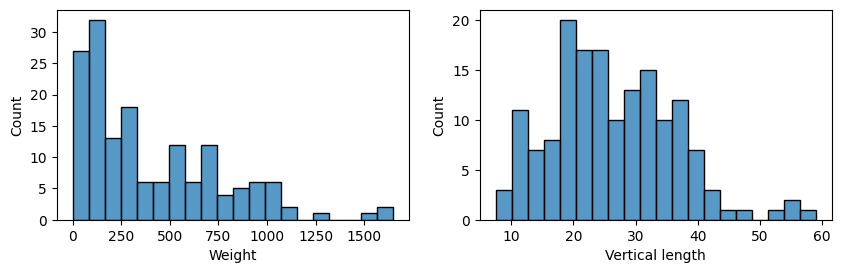

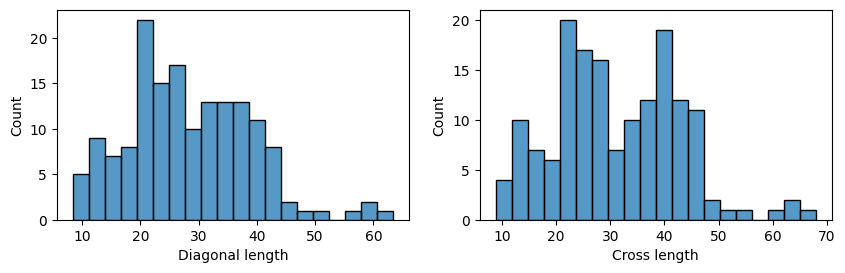

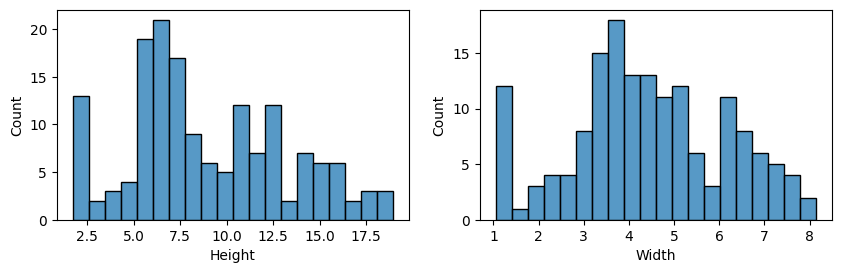

In [129]:
# num_cols = ['fixed acidity','citric acid','sulphates','alcohol']
i=0
while i < len(num_cols)-1:
    fig = plt.figure(figsize=[10,6])
 
    plt.subplot(2,2,1)
    sns.histplot(x=num_cols[i], data=fish,bins=20)
    i += 1
    plt.subplot(2,2,2)
    sns.histplot(x=num_cols[i], data=fish,bins = 20)
    i += 1  

    
    plt.show()


<AxesSubplot:xlabel='Width', ylabel='Weight'>

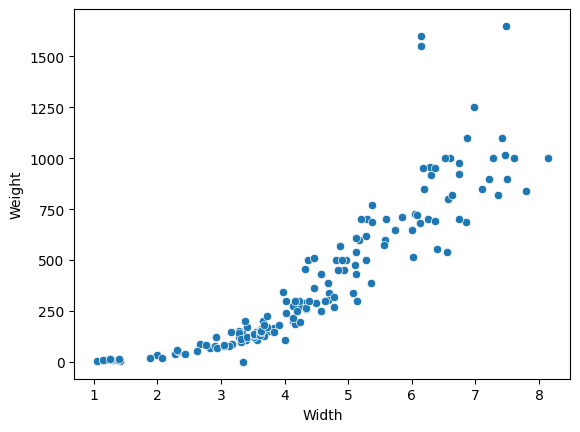

In [136]:
sns.scatterplot(data=fish,x='Width',y='Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

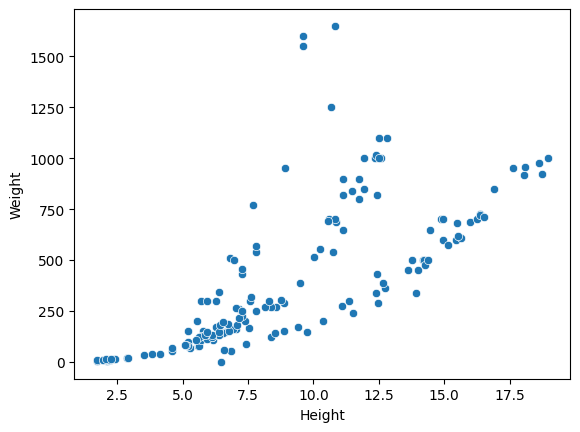

In [137]:
sns.scatterplot(data=fish,x='Height',y='Weight')

<AxesSubplot:xlabel='Vertical length', ylabel='Weight'>

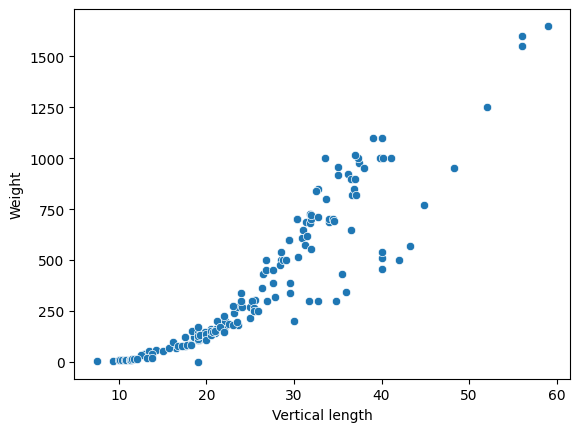

In [138]:
sns.scatterplot(data=fish,x='Vertical length',y='Weight')

# Test Train Split

In [107]:
y = fish['Weight']
X = fish.drop({'Weight','Species'},axis=1)

In [108]:
X

,Vertical length,Diagonal length,Cross length,Height,Width
0,23.2,25.4,30.0,11.52,4.02
1,24.0,26.3,31.2,12.48,4.31
2,23.9,26.5,31.1,12.38,4.70
3,26.3,29.0,33.5,12.73,4.46
4,26.5,29.0,34.0,12.44,5.13
...,...,...,...,...,...
154,11.5,12.2,13.4,2.09,1.39
155,11.7,12.4,13.5,2.43,1.27
156,12.1,13.0,13.8,2.28,1.26
157,13.2,14.3,15.2,2.87,2.07


In [109]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (127, 5)
x test:  (32, 5)
y train:  (127,)
y test:  (32,)


In [112]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [113]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.89
Test R2-score : 0.87
Train CV scores : [0.81593011 0.91676522 0.89788545 0.88943845 0.77495265]
Train CV mean : 0.86


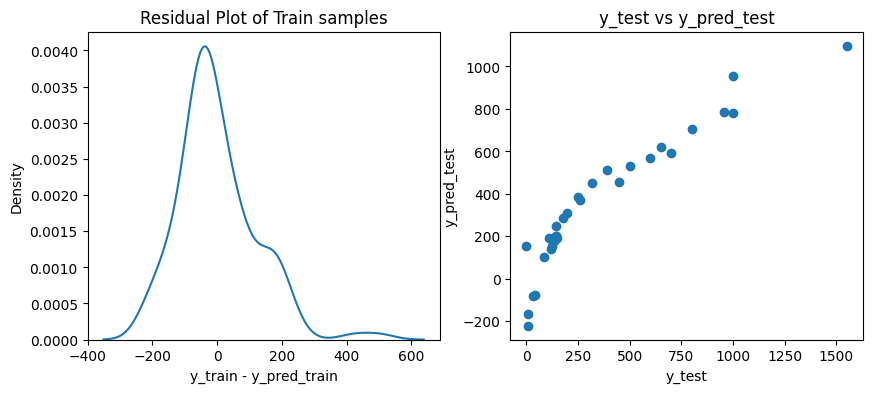

In [114]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.88
Test R2-score : 0.88
Train CV scores : [0.8186515  0.90264888 0.89506847 0.88281226 0.78539005]
Train CV mean : 0.86


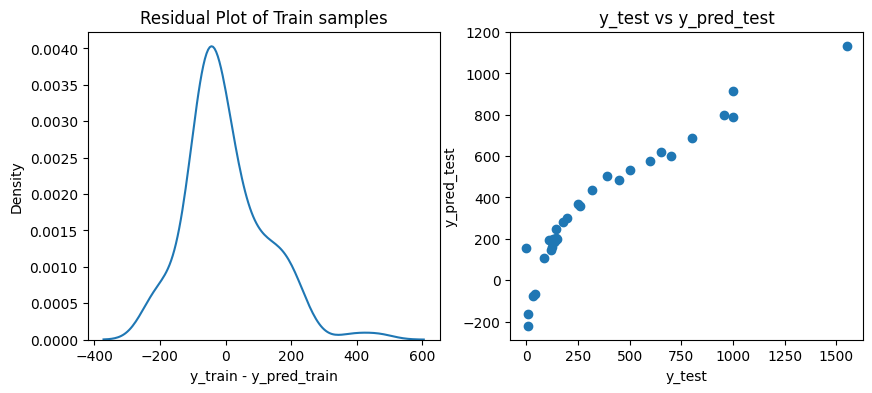

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [116]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))



Train R2-score : 0.89
Test R2-score : 0.87
Train CV scores : [0.8164957  0.90711533 0.89448047 0.88046628 0.78240525]
Train CV mean : 0.86


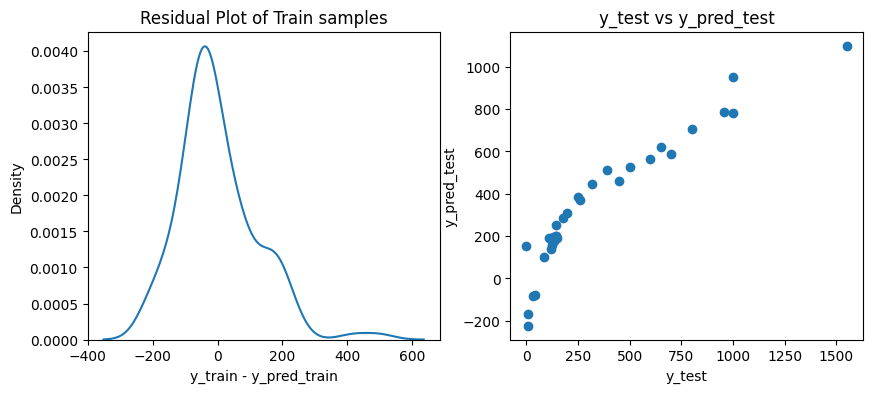

In [117]:
car_pred_model(ls_rs,"lasso.pkl")

Train R2-score : 0.92
Test R2-score : 0.91
Train CV scores : [0.85802592 0.94688688 0.94929373 0.94475959 0.83822096]
Train CV mean : 0.91


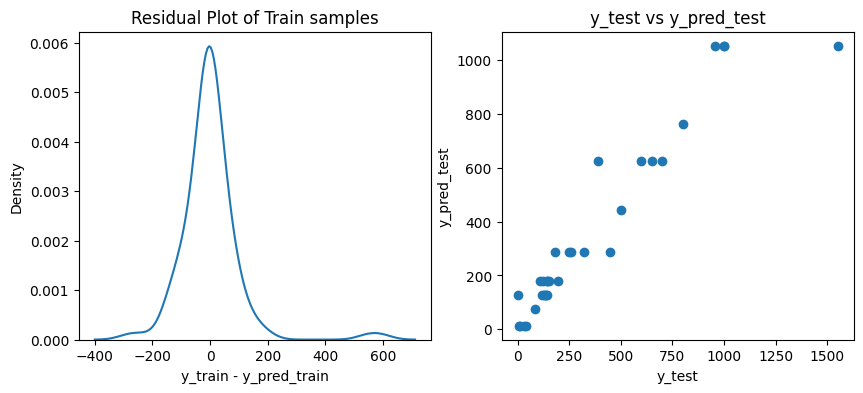

In [118]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import RandomizedSearchCV
# create a regressor object
dt = DecisionTreeRegressor(random_state = 0) 
params = {
    'max_depth': [2, 3, 5, 10, 20,30],
    'min_samples_leaf': [5, 10, 20,30, 50, 100,200]
    
}
dt_rs = RandomizedSearchCV(estimator = dt, param_distributions = params)
car_pred_model(dt_rs,"decision_tree.pkl")

Train R2-score : 0.99
Test R2-score : 0.98
Train CV scores : [0.91003447 0.982523   0.98087186 0.97555253 0.84207314]
Train CV mean : 0.94


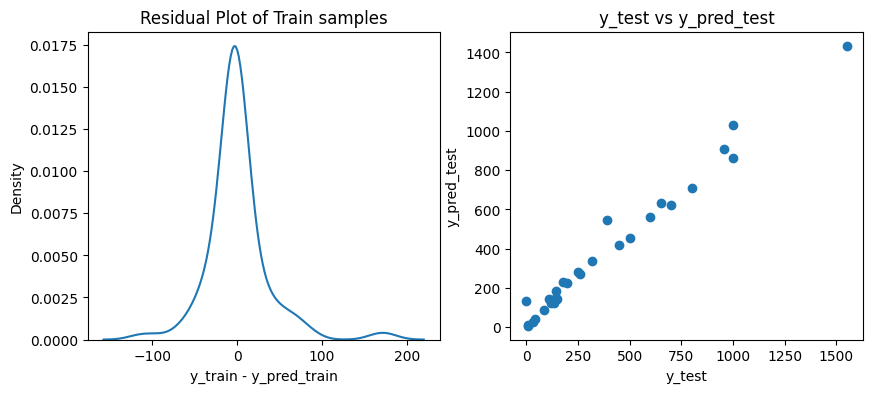

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred_model(rf_rs,'random_forest.pkl')

Train R2-score : 1.0
Test R2-score : 0.98
Train CV scores : [0.9115491  0.95363005 0.98173702 0.98537546 0.88997865]
Train CV mean : 0.94


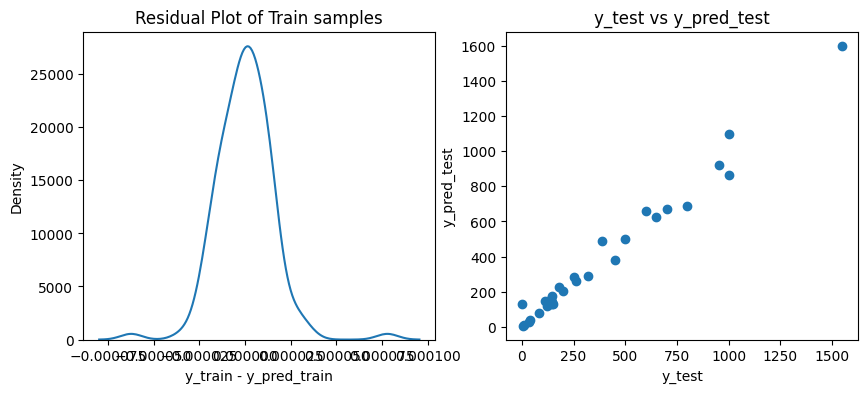

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

car_pred_model(gb_rs,"gradient_boosting.pkl")

In [121]:
Technique = ["LinearRegression","Ridge","Lasso","Decision Tree Regressor","RandomForestRegressor", "GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.89,0.87,0.86
1,Ridge,0.88,0.88,0.86
2,Lasso,0.89,0.87,0.86
3,Decision Tree Regressor,0.92,0.91,0.91
4,RandomForestRegressor,0.99,0.98,0.94
5,GradientBoostingRegressor,1.00,0.98,0.94


# From the analysis we can see that the Gradient Boost Regressor and Random forest regressor produced the Best results with an r2 Score of 0.98
